In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils.fem_utils import WaveguideTemplate, get_pn_perturbation, plot_phase_shifter
from femwell.pn_analytical import k_to_alpha_dB

In [2]:
rib_wg = WaveguideTemplate(
    n_core=3.47, 
    n_box=1.444, 
    thickness=0.22, 
    slab_thickness=0.09, 
    domain_width=6.0
)

# --- Simulation Parameters ---
wavelength = 1.55
width = 0.5
voltages = np.linspace(0, -4, 5)

In [3]:
neff_list = []
loss_list = []

print("Starting PN Junction Sweep...")

for v in voltages:
    # Get the physics function from our helper
    pn_func = get_pn_perturbation(voltage=v, wavelength=wavelength)

    # Solve
    modes = rib_wg.solve_modes(width=width, num_modes=1, perturbation_func=pn_func)
    
    # Store results
    # Real part = Phase, Imag part = Loss
    neff_list.append(np.real(modes[0].n_eff))
    loss_list.append(np.imag(modes[0].n_eff))

# --- Process Data ---
delta_neff = np.array(neff_list) - neff_list[0]
loss_db_cm = k_to_alpha_dB(np.array(loss_list), wavelength)

Starting PN Junction Sweep...


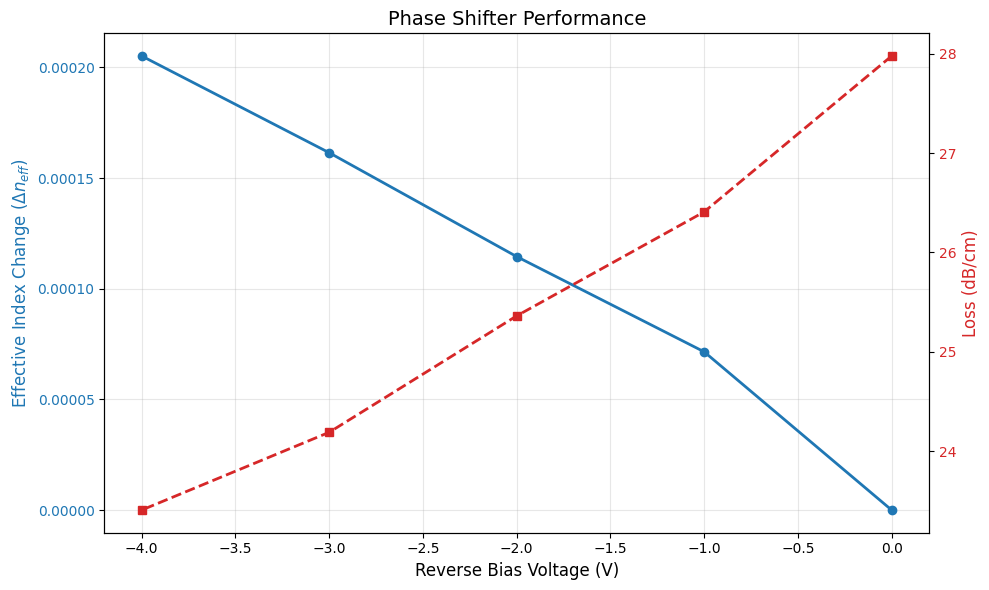

In [4]:
plot_phase_shifter(voltages, delta_neff, loss_db_cm)
plt.show()